<a href="https://colab.research.google.com/github/brandonchuck/Machine-Learning-Final-Project/blob/main/Health_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
# Used by Brandon
in_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Datasets/train.csv')
in_X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Datasets/test.csv')
in_y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Datasets/sample_submission.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import collections
#id matches with ids in test set
collections.Counter(in_X_test.id == in_y_test.id)

#Combine training set with test set and we will shuffle as total to generate new training, validation and test sets 
in_y_test = in_y_test.drop(['id'], axis=1)

#Will develop a check function to concatenate in_X_test with in_y_test to make sure the id matches when combining. 
in_test = pd.concat([in_X_test, in_y_test], axis = 1)

In [ ]:
#@title
in_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [ ]:
#@title
in_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
#Combine in_train and in_test as df 
frames = [in_train, in_test]
df = pd.concat(frames)

In [ ]:
#@title
# Complete dataset
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


In [ ]:
df.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146,508146.000000,508146.000000,508146.000000,508146.000000,508146,508146,508146.000000,508146.000000,508146.000000,508146.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,274325,NaN,NaN,NaN,NaN,267015,256248,NaN,NaN,NaN,NaN
mean,NaN,38.808413,0.997936,26.406572,0.458667,NaN,NaN,30554.453041,111.975838,154.340123,0.091922
std,NaN,15.500179,0.045388,13.224921,0.498289,NaN,NaN,17146.574625,54.246027,83.668793,0.288917
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24381.000000,26.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31661.000000,133.000000,154.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39403.750000,152.000000,227.000000,0.000000


In [ ]:
df.isnull().sum() # no missing values in the dataset 

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [ ]:
# Correlation matrix after preprocessing steps 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.subplots(figsize=(20, 15))

sns.set_theme(style="white")
sns.heatmap(df.corr(),annot = True)

In [ ]:
df.Driving_License.value_counts()

1    507097
0      1049
Name: Driving_License, dtype: int64

In [ ]:
df.Previously_Insured.value_counts()

0    275076
1    233070
Name: Previously_Insured, dtype: int64

In [ ]:
df['Vehicle_Age'].value_counts()

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [ ]:
df['Vehicle_Damage'].value_counts()

Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64

In [ ]:
df.Response.value_counts()

0    461436
1     46710
Name: Response, dtype: int64

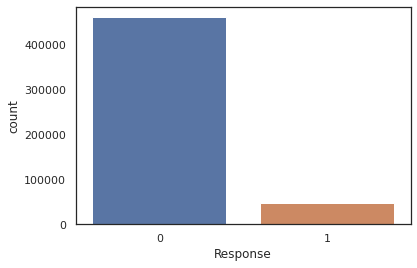

In [ ]:
# response variable 
sns.countplot(df.Response)

In [ ]:
X_train_viz = in_train.drop(['Response'], axis=1)
y_train_viz = in_train[['Response']]

from pandas_profiling import ProfileReport
prof = ProfileReport(pd.concat([X_train_viz, y_train_viz], axis=1))

prof.to_notebook_iframe()

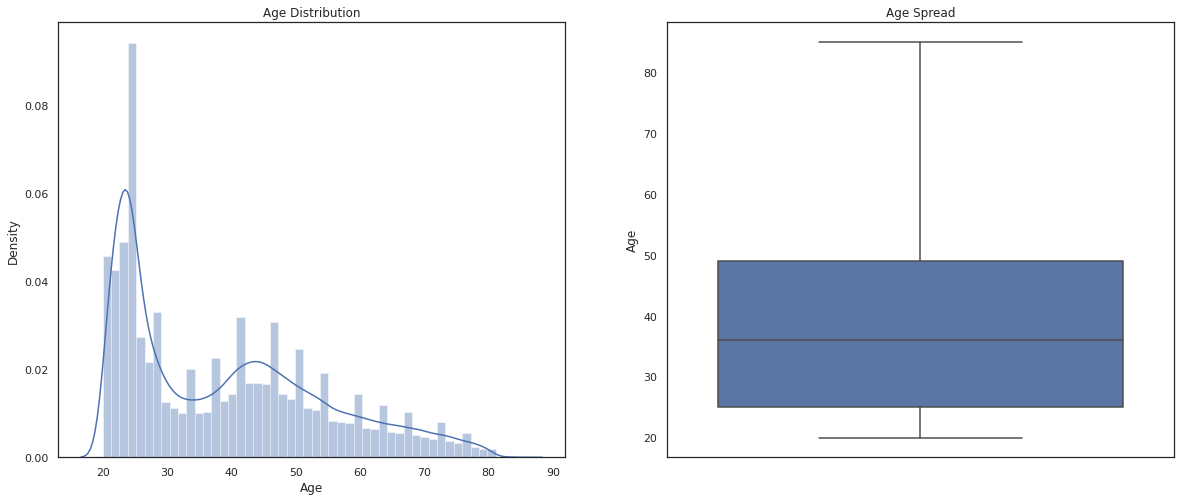

In [ ]:
# Age Distribution
# visualization within a single feature 
%matplotlib inline
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Age Distribution')
sns.distplot(df['Age'])

plt.subplot(1,2,2)
plt.title('Age Spread')
sns.boxplot(y =df['Age'])
plt.show()

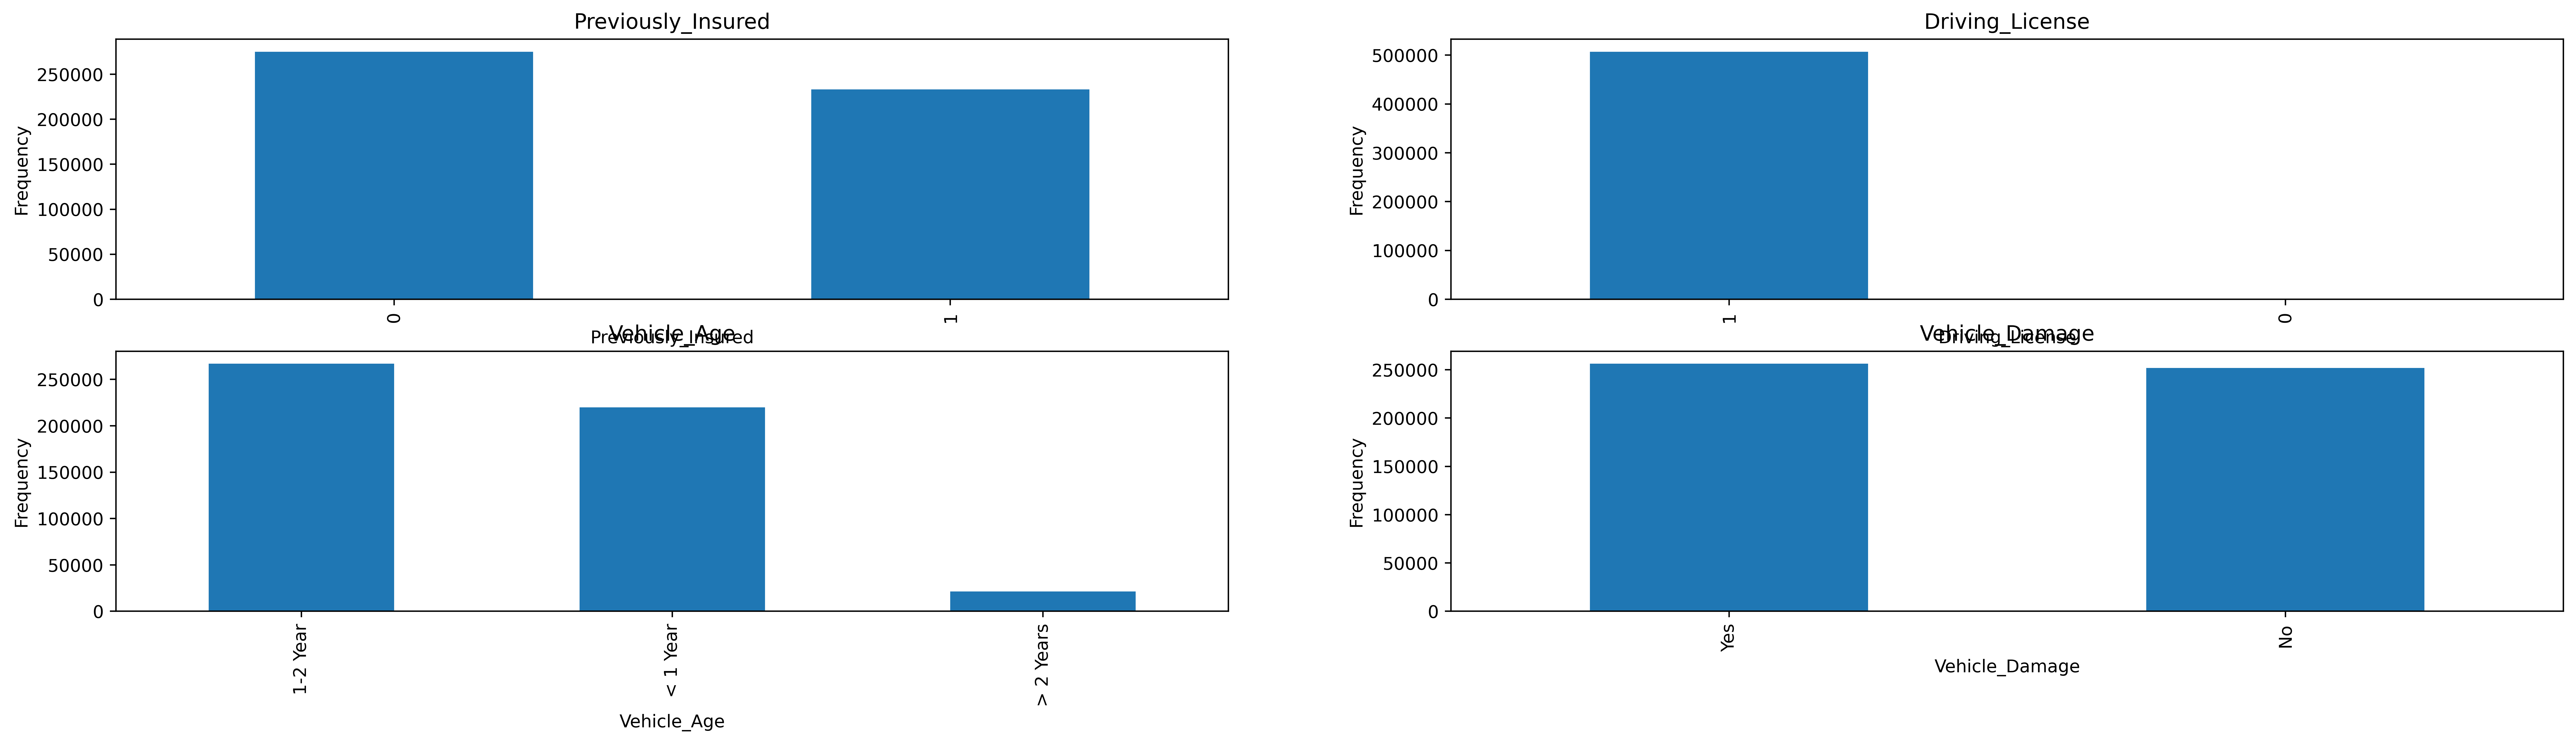

In [ ]:
plt.figure(figsize=(25,6),dpi=500)
plt.subplot(2,2,1)
plt1 = df['Previously_Insured'].value_counts().plot(kind='bar')
plt.title('Previously_Insured')
plt1.set(xlabel='Previously_Insured',ylabel = 'Frequency')

plt.subplot(2,2,2)
plt2 = df['Driving_License'].value_counts().plot(kind='bar')
plt.title('Driving_License')
plt2.set(xlabel='Driving_License',ylabel = 'Frequency')

plt.subplot(2,2,3)
plt3 = df['Vehicle_Age'].value_counts().plot(kind='bar')
plt.title('Vehicle_Age')
plt3.set(xlabel='Vehicle_Age',ylabel = 'Frequency')

plt.subplot(2,2,4)
plt4 = df['Vehicle_Damage'].value_counts().plot(kind='bar')
plt.title('Vehicle_Damage')
plt4.set(xlabel='Vehicle_Damage',ylabel = 'Frequency')
plt.show()

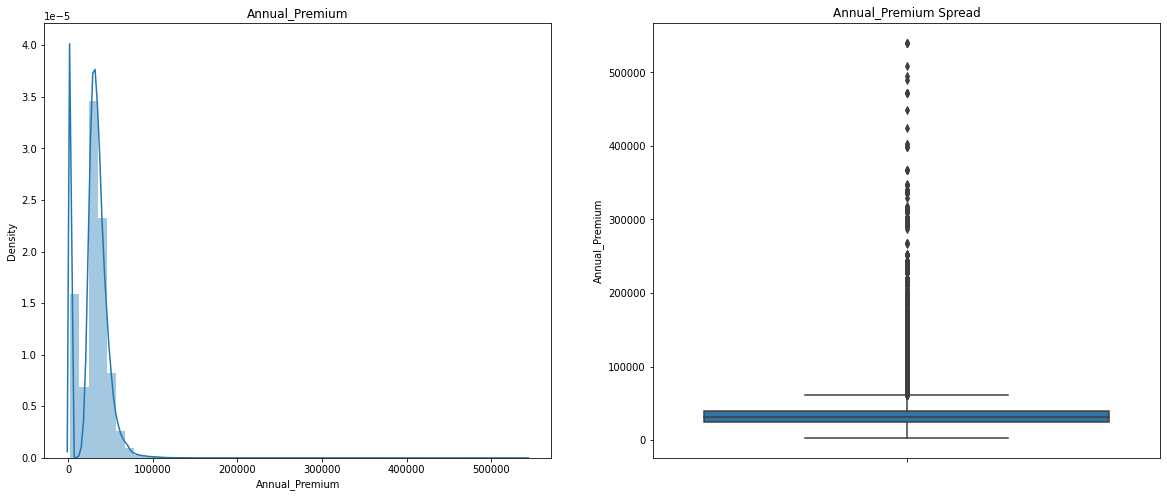

In [ ]:
# Annual_Premium
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Annual_Premium')
sns.distplot(df['Annual_Premium'])

plt.subplot(1,2,2)
plt.title('Annual_Premium Spread')
sns.boxplot(y =df['Annual_Premium'])
plt.show() # we have to deal with the outliers in Annual Premium

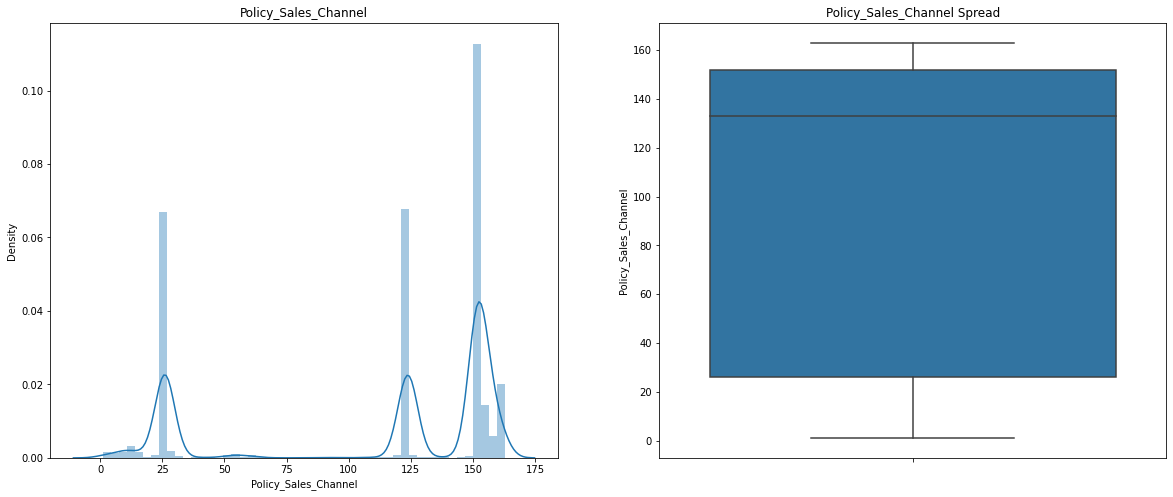

In [ ]:
# Policy_Sales_Channel
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Policy_Sales_Channel')
sns.distplot(df['Policy_Sales_Channel'])

plt.subplot(1,2,2)
plt.title('Policy_Sales_Channel Spread')
sns.boxplot(y =df['Policy_Sales_Channel'])
plt.show()

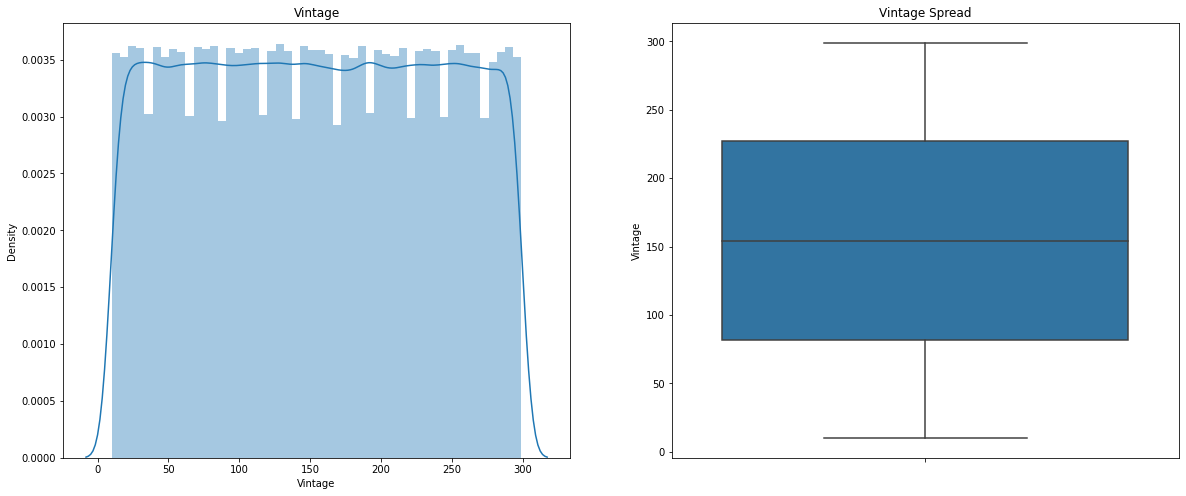

In [ ]:
# Vintage
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Vintage')
sns.distplot(df['Vintage'])

plt.subplot(1,2,2)
plt.title('Vintage Spread')
sns.boxplot(y =df['Vintage'])
plt.show() # Vintage has less variations and does not affect our model in terms of correlation (< 0.001)

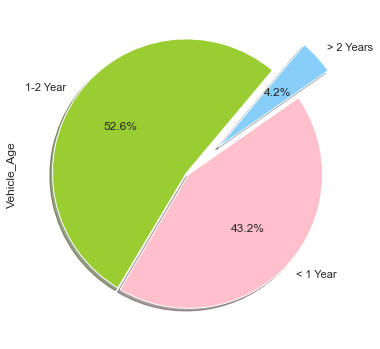

In [ ]:
# vehicle age
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','pink',"lightskyblue"]
in_train['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

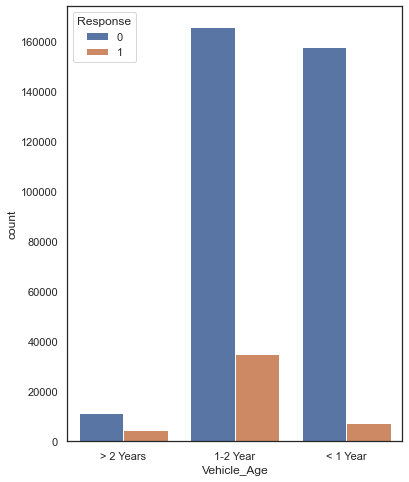

In [ ]:
sns.countplot(df.Vehicle_Age,hue=df.Response)
# for vehicles that are more than 1 year old are more likely to purchase the insurance

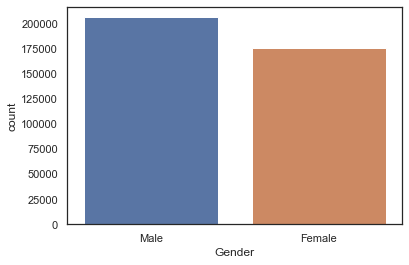

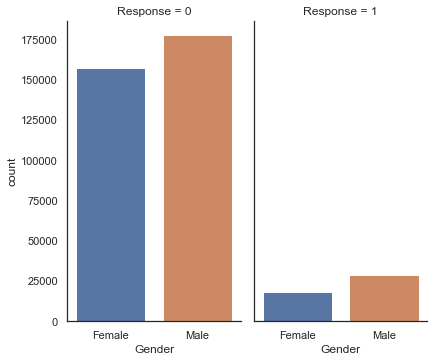

In [ ]:
# feature vs target variable 
sns.countplot(df.Gender)

df=df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
gender_plot = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=5, aspect=.6)
# in general there are more males than female in the dataset

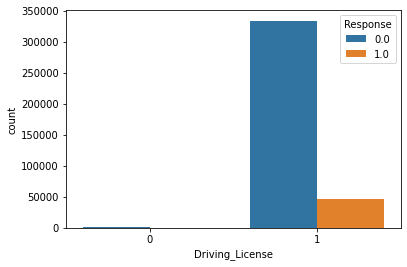

In [ ]:
sns.countplot(df.Driving_License,hue=df.Response) 
# this feature does not help with the model, can be dropped?
# or we can remove person who does not have drivers liscence 

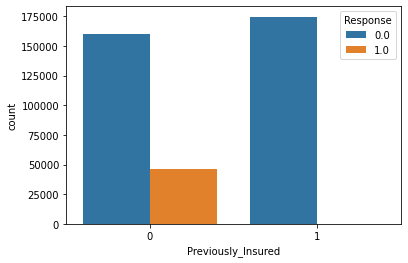

In [ ]:
sns.countplot(df.Previously_Insured,hue=df.Response)
# customers that are not previously insured are more likely to purchase insurance

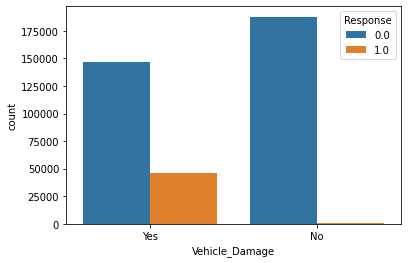

In [ ]:
sns.countplot(df.Vehicle_Damage,hue=df.Response)
# vehicles that have previously damaged are more likely to purchase insurance

## Preprocessing

In [ ]:
# Preprocessing categorical features - dummy variables 

# create a new object feature called age_range
df['age_range'] = df['Age'].apply(lambda x: 'Young' if 20<x<30 else('Middle' if 30 < x < 40 else('Older' if 40<x<65 else 'Elderly')))

categorical_columns = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','age_range']
one_hot_features = pd.get_dummies(df[categorical_columns]) # one-hot encode categorical features

In [ ]:
df_temp = df.drop(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','age_range'], axis=1) 
# drop previous categorical features and combine all the dummy features 
df_numeric = pd.concat([one_hot_features, df_temp], axis = 1) 
df_numeric 

,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,age_range_Elderly,age_range_Middle,age_range_Older,age_range_Young,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,0,0,1,0,1,0,0,1,0,1,44,1,28.0,40454.0,26.0,217,1
1,0,0,1,1,0,0,1,0,1,0,0,0,2,76,1,3.0,33536.0,26.0,183,0
2,0,0,1,0,0,1,0,1,0,0,1,0,3,47,1,28.0,38294.0,26.0,27,1
3,1,0,1,0,1,0,1,0,0,0,0,1,4,21,1,11.0,28619.0,152.0,203,0
4,1,1,0,0,1,0,1,0,0,0,0,1,5,29,1,41.0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,1,0,0,1,0,1,0,0,0,0,1,508142,26,1,37.0,30867.0,152.0,56,0
127033,0,1,0,1,0,0,0,1,0,1,0,0,508143,38,1,28.0,28700.0,122.0,165,0
127034,1,0,1,0,1,0,1,0,0,0,0,1,508144,21,1,46.0,29802.0,152.0,74,0
127035,1,0,1,1,0,0,1,0,1,0,0,0,508145,71,1,28.0,62875.0,26.0,265,0


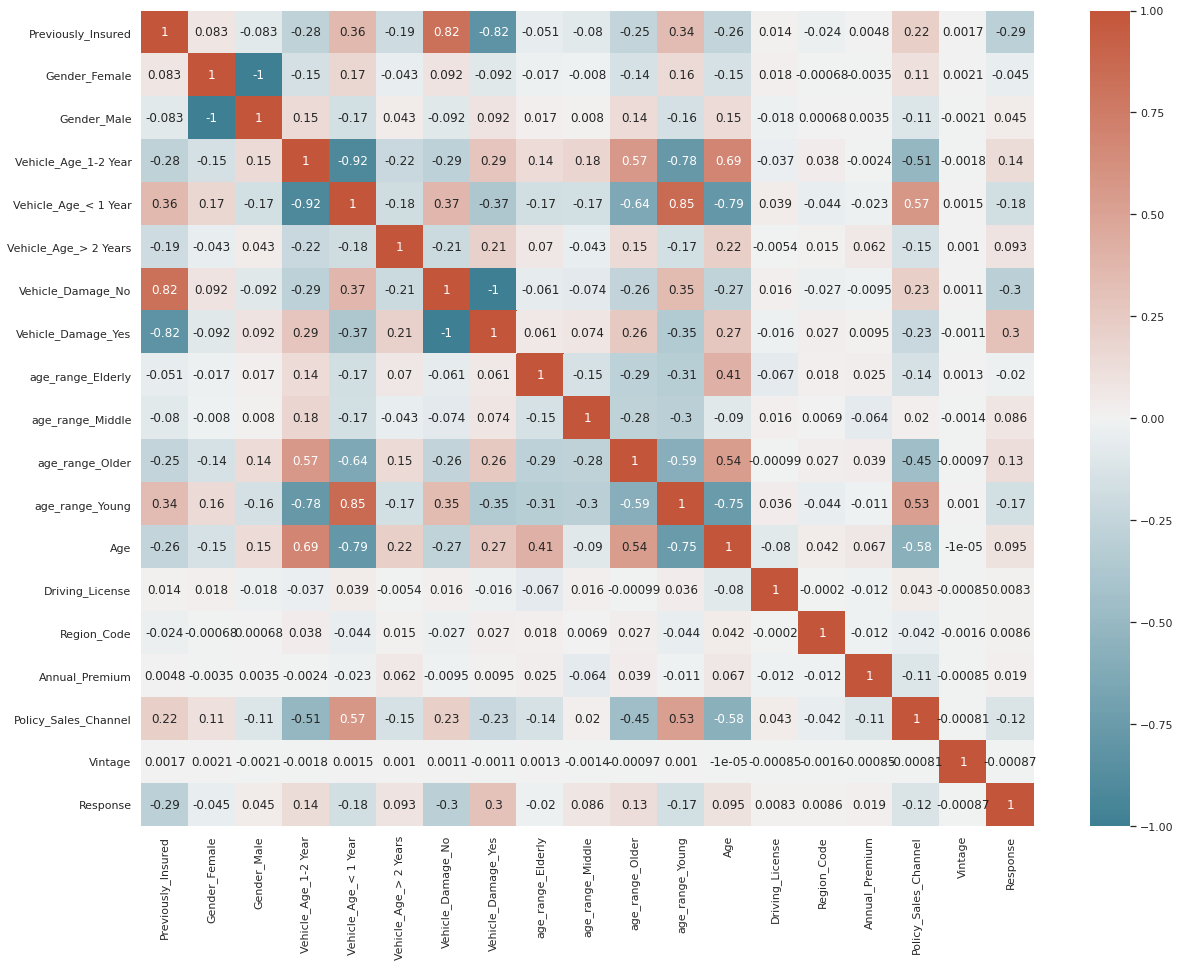

In [ ]:

# Correlation matrix after preprocessing steps 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.subplots(figsize=(20, 15))
#sns.color_palette("vlag", as_cmap=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(df_numeric.corr(),annot = True, cmap=cmap)

## Feature Engineering



In [ ]:
# take a closer look at feature correlations
df_numeric.corr() 

,Previously_Insured,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,age_range_Elderly,age_range_Middle,age_range_Older,age_range_Young,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Previously_Insured,1.000000,0.082726,-0.082726,-0.279989,0.359733,-0.191555,0.823973,-0.823973,-0.050839,-0.079909,-0.254573,0.338602,0.002557,-0.255582,0.014370,-0.023991,0.004776,0.221334,0.001664,-0.290704
Gender_Female,0.082726,1.000000,-1.000000,-0.148676,0.167426,-0.043421,0.092273,-0.092273,-0.017133,-0.008024,-0.141584,0.155823,0.001765,-0.146573,0.017720,-0.000684,-0.003502,0.111565,0.002098,-0.045214
Gender_Male,-0.082726,-1.000000,1.000000,0.148676,-0.167426,0.043421,-0.092273,0.092273,0.017133,0.008024,0.141584,-0.155823,-0.001765,0.146573,-0.017720,0.000684,0.003502,-0.111565,-0.002098,0.045214
Vehicle_Age_1-2 Year,-0.279989,-0.148676,0.148676,1.000000,-0.918770,-0.220248,-0.285564,0.285564,0.142511,0.181791,0.570094,-0.780100,0.000161,0.693125,-0.036883,0.037778,-0.002411,-0.508272,-0.001843,0.139971
Vehicle_Age_< 1 Year,0.359733,0.167426,-0.167426,-0.918770,1.000000,-0.182741,0.371621,-0.371621,-0.171956,-0.165707,-0.635607,0.853678,0.000094,-0.787705,0.039361,-0.043949,-0.022592,0.571194,0.001452,-0.178772
Vehicle_Age_> 2 Years,-0.191555,-0.043421,0.043421,-0.220248,-0.182741,1.000000,-0.207045,0.207045,0.069965,-0.043294,0.150723,-0.166546,-0.000634,0.220137,-0.005400,0.014508,0.061822,-0.145531,0.001002,0.093133
Vehicle_Damage_No,0.823973,0.092273,-0.092273,-0.285564,0.371621,-0.207045,1.000000,-1.000000,-0.061250,-0.073800,-0.258555,0.345570,0.002335,-0.268328,0.015784,-0.027210,-0.009504,0.225856,0.001078,-0.302072
Vehicle_Damage_Yes,-0.823973,-0.092273,0.092273,0.285564,-0.371621,0.207045,-1.000000,1.000000,0.061250,0.073800,0.258555,-0.345570,-0.002335,0.268328,-0.015784,0.027210,0.009504,-0.225856,-0.001078,0.302072
age_range_Elderly,-0.050839,-0.017133,0.017133,0.142511,-0.171956,0.069965,-0.061250,0.061250,1.000000,-0.148170,-0.287005,-0.312767,0.001045,0.414047,-0.066593,0.018341,0.024519,-0.140927,0.001309,-0.019843
age_range_Middle,-0.079909,-0.008024,0.008024,0.181791,-0.165707,-0.043294,-0.073800,0.073800,-0.148170,1.000000,-0.279060,-0.304108,-0.001415,-0.089918,0.016479,0.006877,-0.063793,0.020232,-0.001415,0.085511


In [ ]:
# Creating some new features from highly correlated features

# customer is insured and has no vehicle damage
df_numeric['insured_with_damage'] = df_numeric['Previously_Insured'] * df_numeric['Vehicle_Damage_No']


# customer is not insured and has vehicle damage
df_numeric['not_insured_with_damage'] = df_numeric['Previously_Insured'].apply(lambda x: 1 if x == 0 else 0) * df_numeric['Vehicle_Damage_Yes']


# new car with damage and no insurance
# df_X['new_damaged_no_insurance'] = df_X['Vehicle_Age_< 1 Year'] * df_X['not_insured_with_damage']

In [ ]:
df_numeric.Response.value_counts()

0    461436
1     46710
Name: Response, dtype: int64

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split

# Create X and y Dataset here
df_X = df_numeric.drop(['id', 'Driving_License','Vintage','Response'], axis=1) # drop response col, id col(unique values), Driving_license col and Vintage col.
df_y = df_numeric['Response']

In [ ]:
df_X.shape

(508146, 18)

In [ ]:
# Showing how many responses we have before ADASYN
df_y.value_counts()

0    461436
1     46710
Name: Response, dtype: int64

In [ ]:
col_names = df_X.columns
col_names

Index(['Previously_Insured', 'Gender_Female', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'age_range_Elderly',
       'age_range_Middle', 'age_range_Older', 'age_range_Young', 'Age',
       'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'insured_with_damage', 'not_insured_with_damage'],
      dtype='object')

In [ ]:
# Use ADASYN to balance the dataset
from imblearn.over_sampling import ADASYN

# create ADASYN model
adasyn = ADASYN()

# balance data
df_X_adasyn, df_y_adasyn = adasyn.fit_resample(df_X, df_y)

In [ ]:
# pass the column names of df_X to df_X_adasyn since fitting adasyn breaks it to array without column names 
df_X_adasyn = pd.DataFrame(df_X_adasyn, columns=col_names)
########## Don't run this line for future model fit ######### will generate error on baseline
#df_y_adasyn = pd.DataFrame(df_y_adasyn, columns=['Response'])

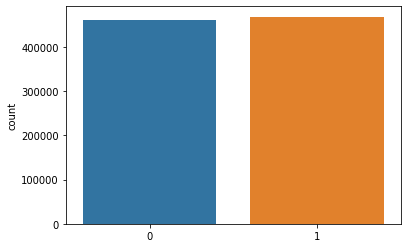

In [ ]:
sns.countplot(df_y_adasyn)

## Train-Test Split Data

In [ ]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_X_adasyn, df_y_adasyn, test_size=0.2, random_state=42)

# Create validation dataset from test dataset
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

In [ ]:
y_train.value_counts()

1    374019
0    369391
dtype: int64

In [ ]:
# training shapes
print("training shapes")
print(X_train.shape)
print(y_train.shape)
print("")


# validation shapes
print("validation shapes")
print(X_val.shape)
print(y_val.shape)
print("")


# test shapes
print("test shapes")
print(X_test.shape)
print(y_test.shape)

training shapes
(743410, 18)
(743410,)

validation shapes
(92926, 18)
(92926,)

test shapes
(92927, 18)
(92927,)


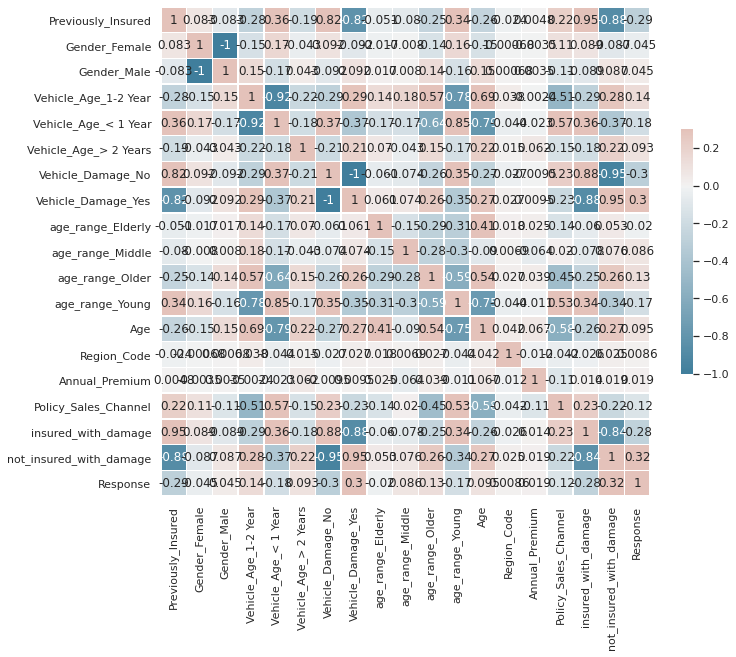

In [ ]:
# Correlation matrix after preprocessing steps 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set_theme(style="white")

def generate_corr_matrix(X, y):
    # Compute the correlation matrix
    corr = pd.concat([X, y], axis=1).corr()
    #corr = corr[y.columns] # only shows the correlation for the labels; comment out to see corr between all features

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3,  center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) # annot shows values
    
generate_corr_matrix(df_X, df_y)

In [ ]:
generate_corr_matrix(df_X_adasyn, df_y_adasyn)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.000000,1.000000,0.530401,0.00000,0.469599,0.0,1.0,0.0,0.0,1.0,0.0,53.756793,28.000000,38818.408797,26.0,0.0,1.0
1,1.0,0.000000,1.000000,1.000000,0.00000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,34.000000,3.000000,29674.000000,160.0,1.0,0.0
2,0.0,1.000000,0.000000,0.243407,0.00000,0.756593,0.0,1.0,0.0,0.0,1.0,0.0,45.513186,28.000000,30354.243407,26.0,0.0,1.0
3,0.0,0.360515,0.639485,0.639485,0.00000,0.360515,0.0,1.0,0.0,0.0,1.0,0.0,45.442060,28.000000,61136.141627,26.0,0.0,1.0
4,0.0,0.318190,0.681810,0.318190,0.68181,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,31.636379,14.363791,34428.772673,26.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743405,1.0,1.000000,0.000000,0.000000,1.00000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,24.000000,36.000000,22575.000000,152.0,1.0,0.0
743406,0.0,0.000000,1.000000,1.000000,0.00000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,56.000000,35.000000,41287.000000,124.0,0.0,1.0
743407,0.0,1.000000,0.000000,0.000000,1.00000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,22.000000,2.000000,18857.000000,152.0,0.0,1.0
743408,0.0,0.000000,1.000000,1.000000,0.00000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,31.000000,7.040205,2630.000000,124.0,0.0,1.0


## Preprocessing for Pipeline

In [ ]:
# This is the preparation for further use of pipelines 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

# preprocessing steps for models such as logistirc regression
preprocess_step = ColumnTransformer([
                                     ('standardize', StandardScaler(), ['Age']),
                                     ('robustScaler', RobustScaler(), ['Annual_Premium'])
                                    ], remainder='passthrough') 

In [ ]:
# proprocessing for tree-based models we do not use StandardScaler
# or we can just skip this pipeline/transformer step for tree-based models
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

# preprocess step for tree-based models only
preprocess_step_tree_based = ColumnTransformer(transformers = [('robustScaler', RobustScaler(), ['Annual_Premium'])], remainder='passthrough') 

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor # etc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Calculate Baseline

In [ ]:
# Create baseline
import statistics
from sklearn.metrics import classification_report

# calculate mode of dataset
def compute_baseline_mode(y_dataset):    
    find_mode = statistics.mode(y_dataset)
    mode = [find_mode for i in range(len(y_dataset))]
    return mode  

# calculate mean of dataset
def compute_baseline_mean(y_dataset):
    find_mean = y_dataset.mean()
    mean = [find_mean for i in range(len(y_dataset))]
    return mean

#print(compute_baseline_mode(Y))
#print(compute_baseline_mean(Y))

y_train_baseline_mode = compute_baseline_mode(y_train)
y_val_baseline_mode = compute_baseline_mode(y_val)
y_test_baseline_mode =compute_baseline_mode(y_test)
#y_train_baseline_mean = compute_baseline_mean(y_train)
#y_val_baseline_mean = compute_baseline_mean(y_val)
#y_test_baseline_mean = compute_baseline_mean(y_test)

In [ ]:
print("Training baseline metrics:", classification_report(y_train, y_train_baseline_mode))
print("Validation baseline metrics:", classification_report(y_val, y_val_baseline_mode))
print("Test baseline metrics:", classification_report(y_test, y_test_baseline_mode))

Training baseline metrics:               precision    recall  f1-score   support

           0       0.00      0.00      0.00    369391
           1       0.50      1.00      0.67    374019

    accuracy                           0.50    743410
   macro avg       0.25      0.50      0.33    743410
weighted avg       0.25      0.50      0.34    743410

Validation baseline metrics:               precision    recall  f1-score   support

           0       0.00      0.00      0.00     45880
           1       0.51      1.00      0.67     47046

    accuracy                           0.51     92926
   macro avg       0.25      0.50      0.34     92926
weighted avg       0.26      0.51      0.34     92926

Test baseline metrics:               precision    recall  f1-score   support

           0       0.00      0.00      0.00     46165
           1       0.50      1.00      0.67     46762

    accuracy                           0.50     92927
   macro avg       0.25      0.50      0.33     9

## Model Metric Functions

In [ ]:
### Model Metrics 
### ROC Curve and f1-score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report

def report_metrics(model, X, y, plots=True):
    
    y_pred = model.predict(X)
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    auc = roc_auc_score(y, probs)
    
    print('ROC AUC=%.3f' % (auc))
    print("f1 score metrics:", classification_report(y, y_pred))
    
    if plots:
        lr_fpr, lr_tpr, _ = roc_curve(y, probs)
        # plot the roc curve for the model
        pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
        # axis labels
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        # show the legend
        pyplot.legend()
        # show the plot
        pyplot.show()


In [ ]:
### GridSearch CV Metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report

def report_CV_metrics(model, X, y, plots=True):
    
    y_pred = model.best_estimator_.predict(X)    
    probs = model.best_estimator_.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    auc = roc_auc_score(y, probs)
    
    print('ROC AUC=%.3f' % (auc))
    print("f1 score metrics:", classification_report(y, y_pred))
    
    if plots:
        lr_fpr, lr_tpr, _ = roc_curve(y, probs)
        # plot the roc curve for the model
        pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
        # axis labels
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        # show the legend
        pyplot.legend()
        # show the plot
        pyplot.show()

In [ ]:
# if just want single f1 score metrics, run these below instead:
#from sklearn.metrics import classification_report
#y_pred = pipe.predict(X_train)
#print("Training metrics:", classification_report(y_train, y_pred))

In [ ]:
### Sample the set to reduce time on ensemble CV 
###  no validation set here, use training and test 

from random import sample 
   
df_sample = df_numeric.sample(frac=0.05, replace=False, random_state=22)
X_sample = df_sample.drop(['Response'], axis=1)
y_sample = df_sample['Response']

# Create train and test datasets
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

## DecisionTree Pipeline

In [ ]:
### Decision Tree Pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=26)
pipe_tree = Pipeline([('preprocess_tree', preprocess_step_tree_based), ('tree', decision_tree)])
pipe_tree.fit(X_train, y_train)

ROC AUC=0.988
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.94      0.93    369391
           1       0.94      0.92      0.93    374019

    accuracy                           0.93    743410
   macro avg       0.93      0.93      0.93    743410
weighted avg       0.93      0.93      0.93    743410

None
ROC AUC=0.961
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     45880
           1       0.92      0.90      0.91     47046

    accuracy                           0.91     92926
   macro avg       0.91      0.91      0.91     92926
weighted avg       0.91      0.91      0.91     92926

None
ROC AUC=0.959
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     46165
           1       0.92      0.90      0.91     46762

    accuracy                           0.91     92927
   macro avg       0.9

ROC AUC=0.988
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.94      0.93    369391
           1       0.94      0.92      0.93    374019

    accuracy                           0.93    743410
   macro avg       0.93      0.93      0.93    743410
weighted avg       0.93      0.93      0.93    743410



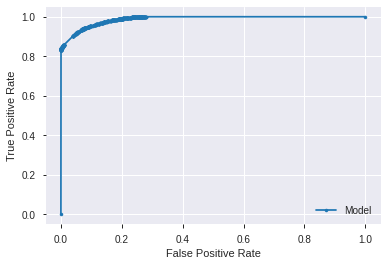

None
ROC AUC=0.961
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     45880
           1       0.92      0.90      0.91     47046

    accuracy                           0.91     92926
   macro avg       0.91      0.91      0.91     92926
weighted avg       0.91      0.91      0.91     92926



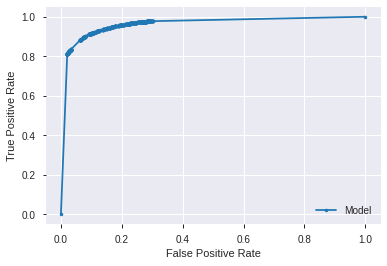

None
ROC AUC=0.959
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     46165
           1       0.92      0.90      0.91     46762

    accuracy                           0.91     92927
   macro avg       0.91      0.91      0.91     92927
weighted avg       0.91      0.91      0.91     92927



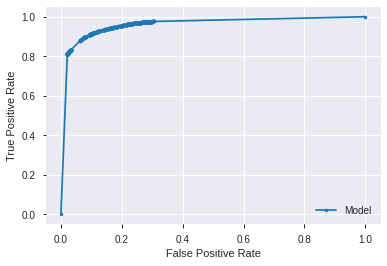

None


In [ ]:
print(report_metrics(pipe_tree, X_train, y_train))
print(report_metrics(pipe_tree, X_val, y_val))
print(report_metrics(pipe_tree, X_test, y_test))

In [ ]:
### CV Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'tree__max_depth': [38,40,42,44], 'tree__criterion':['gini']} 
]
# tried 'tree__max_depth': [34,40,45], 40 is the best one
cv_tree = GridSearchCV(pipe_tree, param_grid, n_jobs=-1, scoring='f1_macro')
cv_tree.fit(X_train, y_train)
print("Best parameter (CV):" % cv_tree.best_score_)
print(cv_tree.best_params_)

Best parameter (CV):
{'tree__criterion': 'gini', 'tree__max_depth': 40}


ROC AUC=0.999
f1 score metrics:               precision    recall  f1-score   support

           0       0.97      0.99      0.98    369391
           1       0.99      0.97      0.98    374019

    accuracy                           0.98    743410
   macro avg       0.98      0.98      0.98    743410
weighted avg       0.98      0.98      0.98    743410



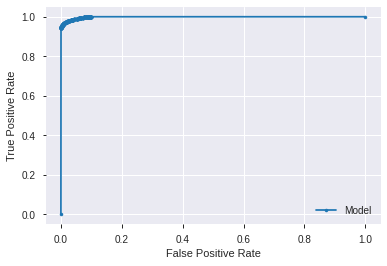

None


In [ ]:
print(report_CV_metrics(cv_tree, X_train, y_train, plots=True))

ROC AUC=0.938
f1 score metrics:               precision    recall  f1-score   support

           0       0.91      0.93      0.92     45880
           1       0.93      0.91      0.92     47046

    accuracy                           0.92     92926
   macro avg       0.92      0.92      0.92     92926
weighted avg       0.92      0.92      0.92     92926



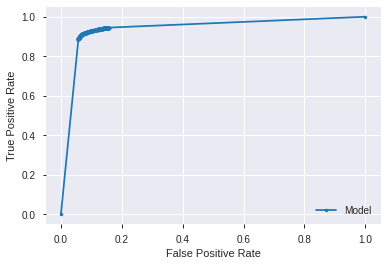

None


In [ ]:
print(report_CV_metrics(cv_tree, X_val, y_val, plots=True))

ROC AUC=0.935
f1 score metrics:               precision    recall  f1-score   support

           0       0.91      0.93      0.92     46165
           1       0.93      0.91      0.92     46762

    accuracy                           0.92     92927
   macro avg       0.92      0.92      0.92     92927
weighted avg       0.92      0.92      0.92     92927



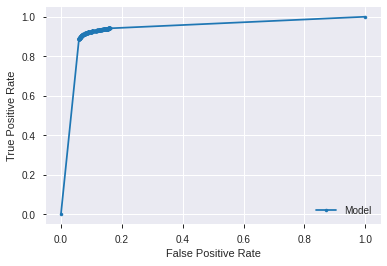

None


In [ ]:
print(report_CV_metrics(cv_tree, X_test, y_test, plots=True))

## Random Forest Classifer Pipeline

In [ ]:
### Random Forest Pipeline 
from sklearn.ensemble import RandomForestClassifier

# format of parameters: RandomForestClassifier(n_estimators=100 default, 
#   max_depth=22, n_jobs=-1, max_features="auto" default)
rf_clf = RandomForestClassifier(max_depth=40, n_estimators=100, n_jobs=-1) 

pipe_rf = Pipeline([('preprocess_tree', preprocess_step_tree_based), ('rfc', rf_clf)])
pipe_rf.fit(X_train, y_train)

print(report_metrics(pipe_rf, X_train, y_train, plots=True))

ROC AUC=0.999
f1 score metrics:               precision    recall  f1-score   support

           0       0.99      0.98      0.99    369391
           1       0.98      0.99      0.99    374019

    accuracy                           0.99    743410
   macro avg       0.99      0.99      0.99    743410
weighted avg       0.99      0.99      0.99    743410

None


ROC AUC=0.999
f1 score metrics:               precision    recall  f1-score   support

           0       0.99      0.98      0.99    369391
           1       0.98      0.99      0.99    374019

    accuracy                           0.99    743410
   macro avg       0.99      0.99      0.99    743410
weighted avg       0.99      0.99      0.99    743410



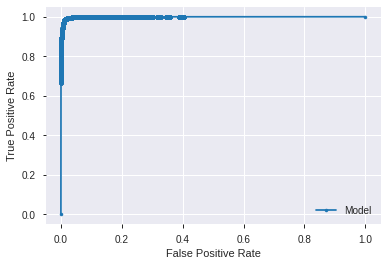

None


In [ ]:
print(report_metrics(pipe_rf, X_train, y_train, plots=True))

ROC AUC=0.980
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.94      0.93     45880
           1       0.94      0.92      0.93     47046

    accuracy                           0.93     92926
   macro avg       0.93      0.93      0.93     92926
weighted avg       0.93      0.93      0.93     92926



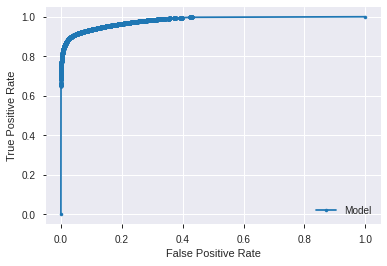

None


In [ ]:
print(report_metrics(pipe_rf, X_val, y_val, plots=True))

ROC AUC=0.980
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.93      0.93     46165
           1       0.93      0.92      0.93     46762

    accuracy                           0.93     92927
   macro avg       0.93      0.93      0.93     92927
weighted avg       0.93      0.93      0.93     92927



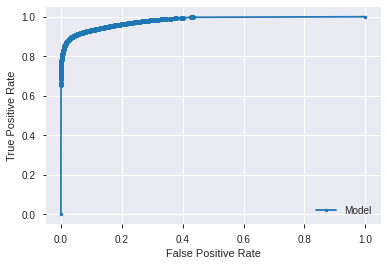

None


In [ ]:
print(report_metrics(pipe_rf, X_test, y_test, plots=True))

In [ ]:
print(rf_clf.feature_importances_)
print(col_names)

[0.10421228 0.04399517 0.04667168 0.05321889 0.04636654 0.03519398
 0.0117157  0.08241084 0.08769957 0.02509392 0.0163311  0.02285078
 0.01437613 0.12077327 0.07346153 0.04980615 0.03736592 0.12845653]
Index(['Previously_Insured', 'Gender_Female', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'age_range_Elderly',
       'age_range_Middle', 'age_range_Older', 'age_range_Young', 'Age',
       'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'insured_with_damage', 'not_insured_with_damage'],
      dtype='object')


In [ ]:
### Random Forest GridSearchCV 

from sklearn.model_selection import GridSearchCV
param_grid = [
    {'rfc__n_estimators': [120, 150], 'rfc__max_features': ["auto", "log2"], 'rfc__max_depth': [38,40,42]}
    # {'rfc__bootstrap': [False], 'rfc__n_estimators': [100, 120], 'rfc__max_depth': [55,58]} 
]

cv_rf = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1) #, return_train_score=True
cv_rf.fit(X_train, y_train)
print(cv_rf.best_estimator_)

print(report_CV_metrics(cv_rf, X_train, y_train, plots=True))

Pipeline(memory=None,
         steps=[('preprocess_tree',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('robustScaler',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['Annual_Premium'])],
                                   verbose=False)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=N

ROC AUC=0.999
f1 score metrics:               precision    recall  f1-score   support

           0       0.99      0.99      0.99    369391
           1       0.99      0.99      0.99    374019

    accuracy                           0.99    743410
   macro avg       0.99      0.99      0.99    743410
weighted avg       0.99      0.99      0.99    743410



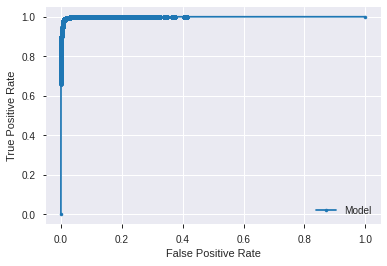

None


In [ ]:
print(report_CV_metrics(cv_rf, X_train, y_train, plots=True))

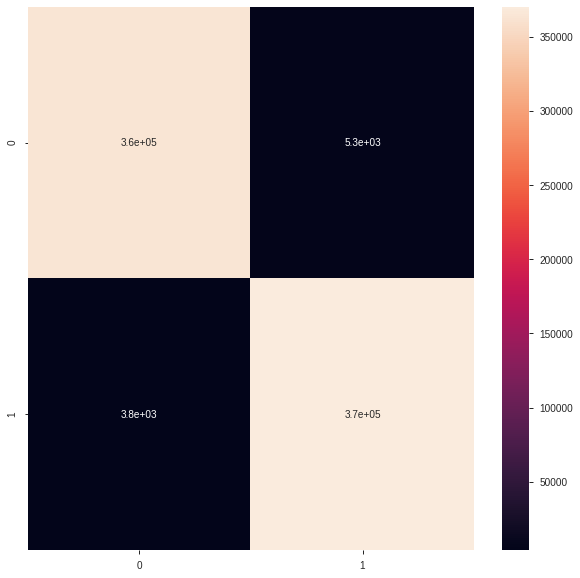

In [ ]:
from sklearn.metrics import confusion_matrix

#if plot doesn't show up try
#%matplotlib inline
#plt.close('all')

y_pred = cv_rf.best_estimator_.predict(X_train)  
fig, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True)

ROC AUC=0.981
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.94      0.93     45880
           1       0.94      0.92      0.93     47046

    accuracy                           0.93     92926
   macro avg       0.93      0.93      0.93     92926
weighted avg       0.93      0.93      0.93     92926



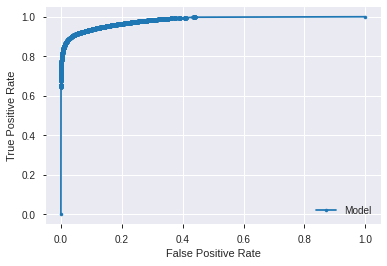

None


In [ ]:
print(report_CV_metrics(cv_rf, X_val, y_val, plots=True))

ROC AUC=0.980
f1 score metrics:               precision    recall  f1-score   support

           0       0.92      0.93      0.93     46165
           1       0.93      0.92      0.93     46762

    accuracy                           0.93     92927
   macro avg       0.93      0.93      0.93     92927
weighted avg       0.93      0.93      0.93     92927



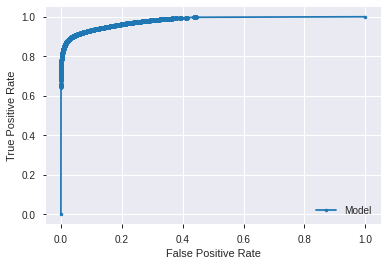

None


In [ ]:
print(report_CV_metrics(cv_rf, X_test, y_test, plots=True))

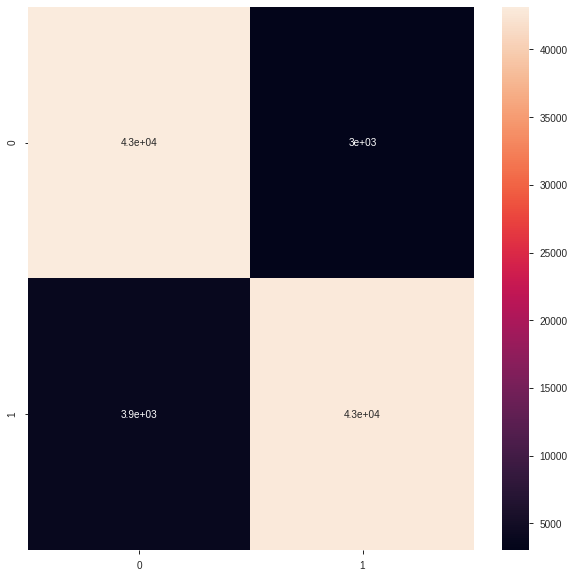

In [ ]:
### Confusion Matrix
#import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#if plot doesn't show up try
%matplotlib inline
plt.close('all')

y_pred = cv_rf.best_estimator_.predict(X_test)  
fig, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

plt.savefig('confusion cv.png')

## Logistic Regression Pipeline

In [ ]:
### Logistic regression 
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(penalty='l2', C=0.5, solver='saga',
                          max_iter=100, multi_class='auto', warm_start=False, n_jobs=-1)
#from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([ ('preprocess', preprocess_step), ('logr', logr) ]) 
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardize',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Age']),
                                                 ('robustScaler',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True

ROC AUC=0.829
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73    369391
           1       0.71      0.95      0.81    374019

    accuracy                           0.78    743410
   macro avg       0.82      0.78      0.77    743410
weighted avg       0.82      0.78      0.77    743410



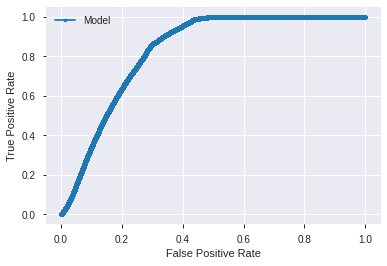

None


In [ ]:
print(report_metrics(pipe_lr, X_train, y_train))

ROC AUC=0.830
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73     45880
           1       0.71      0.96      0.82     47046

    accuracy                           0.78     92926
   macro avg       0.82      0.78      0.77     92926
weighted avg       0.82      0.78      0.77     92926



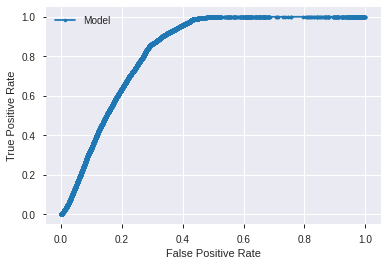

None


In [ ]:
print(report_metrics(pipe_lr, X_val, y_val))

ROC AUC=0.828
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73     46165
           1       0.71      0.95      0.81     46762

    accuracy                           0.78     92927
   macro avg       0.82      0.78      0.77     92927
weighted avg       0.82      0.78      0.77     92927



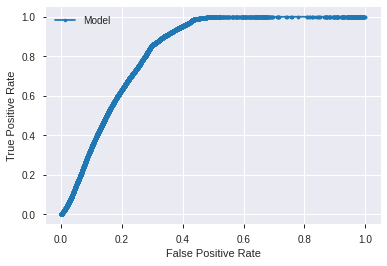

None


In [ ]:
print(report_metrics(pipe_lr, X_test, y_test))

In [ ]:
# Logistic regression GridSearchCV??? if we can do that 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'logr__penalty': ['l1', 'l2'], 'logr__C':[0.01, 10, 100]} 
]

cv_lr = GridSearchCV(pipe_lr, param_grid, n_jobs=-1, scoring='f1_macro')
cv_lr.fit(X_train, y_train)
print("Best parameter (CV):" % cv_lr.best_score_)
print(cv_lr.best_params_)

Best parameter (CV):
{'logr__C': 10, 'logr__penalty': 'l1'}


ROC AUC=0.829
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73    369391
           1       0.71      0.95      0.81    374019

    accuracy                           0.78    743410
   macro avg       0.82      0.78      0.77    743410
weighted avg       0.82      0.78      0.77    743410



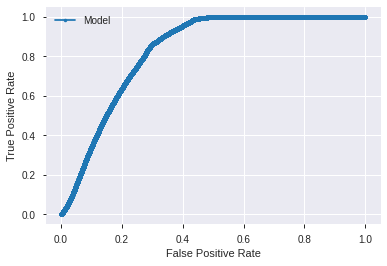

None


In [ ]:
print(report_CV_metrics(cv_lr, X_train, y_train))

ROC AUC=0.830
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73     45880
           1       0.71      0.96      0.82     47046

    accuracy                           0.78     92926
   macro avg       0.82      0.78      0.77     92926
weighted avg       0.82      0.78      0.77     92926



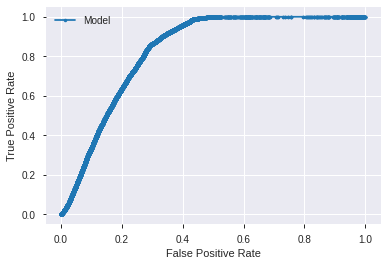

None


In [ ]:
print(report_CV_metrics(cv_lr, X_val, y_val))

ROC AUC=0.828
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.60      0.73     46165
           1       0.71      0.95      0.81     46762

    accuracy                           0.78     92927
   macro avg       0.82      0.78      0.77     92927
weighted avg       0.82      0.78      0.77     92927



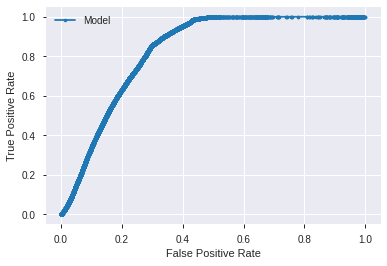

None


In [ ]:
print(report_CV_metrics(cv_lr, X_test, y_test))

## KNNClasiifier Pipeline

In [ ]:
# KNN classifier to look for the best nearest neighbor k 
np.random.seed(5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

#Test K values to find an optimum to fit into the KKN model
f1_val = [] #to store F1 Score values 

for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on validation set
    f1 = f1_score(y_test, pred) #calculate mse
    f1_val.append(f1) 
    print('F1 Score for k= ' , K , 'is:', f1)

#plotting the mse values against k values
curve = pd.DataFrame(f1_val) #elbow curve 
curve.plot()

F1 Score for k=  1 is: 0.8758474147526054
F1 Score for k=  2 is: 0.8502012960451248
F1 Score for k=  3 is: 0.8554423940051659
F1 Score for k=  4 is: 0.84623076609118
F1 Score for k=  5 is: 0.8425648126778984
F1 Score for k=  6 is: 0.8377100371747211
F1 Score for k=  7 is: 0.8328051164291272
F1 Score for k=  8 is: 0.8304965920155793
F1 Score for k=  9 is: 0.8252555939090115
F1 Score for k=  10 is: 0.8227788325318273
F1 Score for k=  11 is: 0.8173779603447147
F1 Score for k=  12 is: 0.8153230745674475
F1 Score for k=  13 is: 0.8115942028985507
F1 Score for k=  14 is: 0.8092961107134334
F1 Score for k=  15 is: 0.8058983183636923
F1 Score for k=  16 is: 0.803164900454169
F1 Score for k=  17 is: 0.8003842172506084
F1 Score for k=  18 is: 0.7974256352729797
F1 Score for k=  19 is: 0.7956904995102841
F1 Score for k=  20 is: 0.7931639828055759


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#After running the k nearest neighbors, we found 3 to be the optimal
KNN = KNeighborsClassifier(n_neighbors=3)
pipe_knn = Pipeline([('preprocess', preprocess_step), ('knn', KNN)]) 
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardize',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Age']),
                                                 ('robustScaler',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True

ROC AUC=0.986
f1 score metrics:               precision    recall  f1-score   support

           0       0.93      0.95      0.94    369391
           1       0.95      0.93      0.94    374019

    accuracy                           0.94    743410
   macro avg       0.94      0.94      0.94    743410
weighted avg       0.94      0.94      0.94    743410



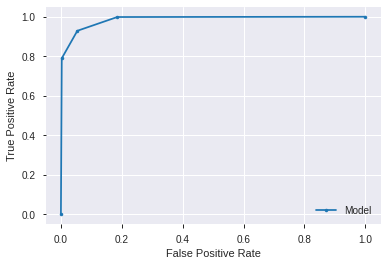

None


In [ ]:
print(report_metrics(pipe_knn, X_train, y_train))

ROC AUC=0.936
f1 score metrics:               precision    recall  f1-score   support

           0       0.86      0.89      0.88     45880
           1       0.89      0.86      0.88     47046

    accuracy                           0.88     92926
   macro avg       0.88      0.88      0.88     92926
weighted avg       0.88      0.88      0.88     92926



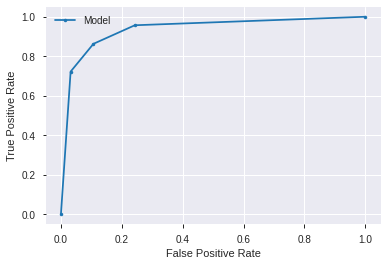

None


In [ ]:
print(report_metrics(pipe_knn, X_val, y_val))

ROC AUC=0.935
f1 score metrics:               precision    recall  f1-score   support

           0       0.86      0.89      0.88     46165
           1       0.89      0.86      0.88     46762

    accuracy                           0.88     92927
   macro avg       0.88      0.88      0.88     92927
weighted avg       0.88      0.88      0.88     92927



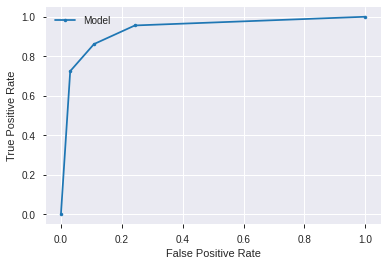

None


In [ ]:
print(report_metrics(pipe_knn, X_test, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'knn__n_neighbors': [3, 5], 'knn__weights':['uniform', 'distance']} 
]

cv_knn = GridSearchCV(pipe_knn, param_grid, n_jobs=-1, scoring='f1_macro')
cv_knn.fit(X_train, y_train)
print("Best parameter (CV):" % cv_knn.best_score_)
print(cv_knn.best_params_)

Best parameter (CV):
{'knn__n_neighbors': 3, 'knn__weights': 'distance'}


ROC AUC=0.998
f1 score metrics:               precision    recall  f1-score   support

           0       0.99      0.99      0.99    369391
           1       0.99      0.99      0.99    374019

    accuracy                           0.99    743410
   macro avg       0.99      0.99      0.99    743410
weighted avg       0.99      0.99      0.99    743410



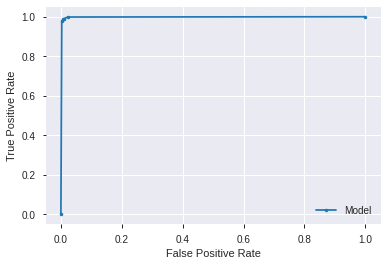

None


In [ ]:
print(report_CV_metrics(cv_knn, X_train, y_train))

ROC AUC=0.938
f1 score metrics:               precision    recall  f1-score   support

           0       0.87      0.90      0.88     45880
           1       0.90      0.87      0.88     47046

    accuracy                           0.88     92926
   macro avg       0.88      0.88      0.88     92926
weighted avg       0.88      0.88      0.88     92926



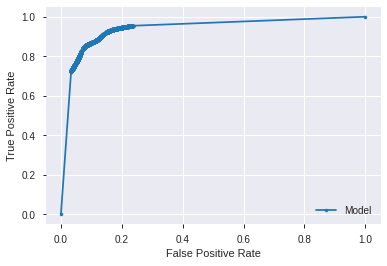

None


In [ ]:
print(report_CV_metrics(cv_knn, X_val, y_val))

ROC AUC=0.937
f1 score metrics:               precision    recall  f1-score   support

           0       0.87      0.90      0.88     46165
           1       0.89      0.87      0.88     46762

    accuracy                           0.88     92927
   macro avg       0.88      0.88      0.88     92927
weighted avg       0.88      0.88      0.88     92927



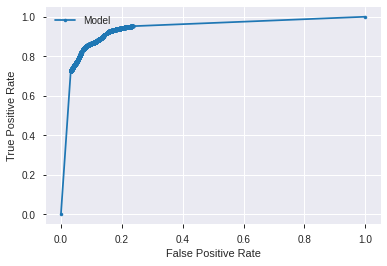

None


In [ ]:
print(report_CV_metrics(cv_knn, X_test, y_test))

## XGBoost Classifier Pipeline

In [ ]:
### XGBoost Pipeline
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 6, n_estimators = 100) 

pipe_xgb = Pipeline([('preprocess_tree', preprocess_step_tree_based), ('xgb', xgb_clf)])
pipe_xgb.fit(X_train, y_train)

print(report_metrics(pipe_xgb, X_train, y_train, plots=True))

ROC AUC=0.976
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.91      0.91    369391
           1       0.91      0.90      0.91    374019

    accuracy                           0.91    743410
   macro avg       0.91      0.91      0.91    743410
weighted avg       0.91      0.91      0.91    743410

None


ROC AUC=0.976
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.91      0.91    369391
           1       0.91      0.90      0.91    374019

    accuracy                           0.91    743410
   macro avg       0.91      0.91      0.91    743410
weighted avg       0.91      0.91      0.91    743410



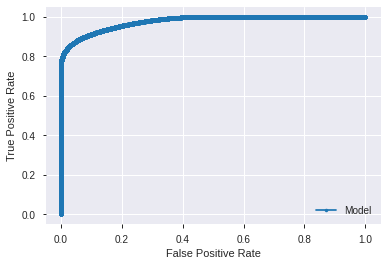

None


In [ ]:
print(report_metrics(pipe_xgb, X_train, y_train, plots=True))

ROC AUC=0.976
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.92      0.91     45880
           1       0.92      0.90      0.91     47046

    accuracy                           0.91     92926
   macro avg       0.91      0.91      0.91     92926
weighted avg       0.91      0.91      0.91     92926



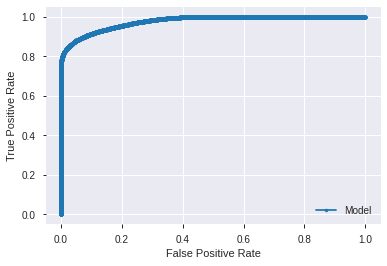

None


In [ ]:
print(report_metrics(pipe_xgb, X_val, y_val, plots=True))

ROC AUC=0.976
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.91      0.91     46165
           1       0.91      0.90      0.91     46762

    accuracy                           0.91     92927
   macro avg       0.91      0.91      0.91     92927
weighted avg       0.91      0.91      0.91     92927



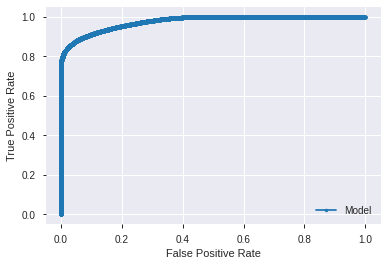

None


In [ ]:
print(report_metrics(pipe_xgb, X_test, y_test, plots=True))

In [ ]:
### XGBoost GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'xgb__n_estimators': [50, 100], 'xgb__learning_rate': [0.1, 0.5], 'xgb__max_depth': [6, 7, 8]}
]

cv_xgb = GridSearchCV(pipe_xgb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1) #, return_train_score=True
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_estimator_)

print(report_CV_metrics(cv_xgb, X_train, y_train, plots=True))

Pipeline(memory=None,
         steps=[('preprocess_tree',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('robustScaler',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                                                               with_scaling=True),
                                                  ['Annual_Premium'])],
                                   verbose=False)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsampl

ROC AUC=0.979
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.94      0.92     45880
           1       0.94      0.90      0.92     47046

    accuracy                           0.92     92926
   macro avg       0.92      0.92      0.92     92926
weighted avg       0.92      0.92      0.92     92926



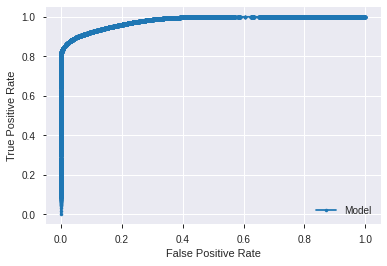

None


In [ ]:
print(report_CV_metrics(cv_xgb, X_val, y_val, plots=True))

ROC AUC=0.979
f1 score metrics:               precision    recall  f1-score   support

           0       0.90      0.94      0.92     46165
           1       0.94      0.90      0.92     46762

    accuracy                           0.92     92927
   macro avg       0.92      0.92      0.92     92927
weighted avg       0.92      0.92      0.92     92927



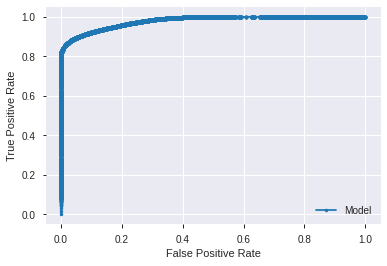

None


In [ ]:
print(report_CV_metrics(cv_xgb, X_test, y_test, plots=True))

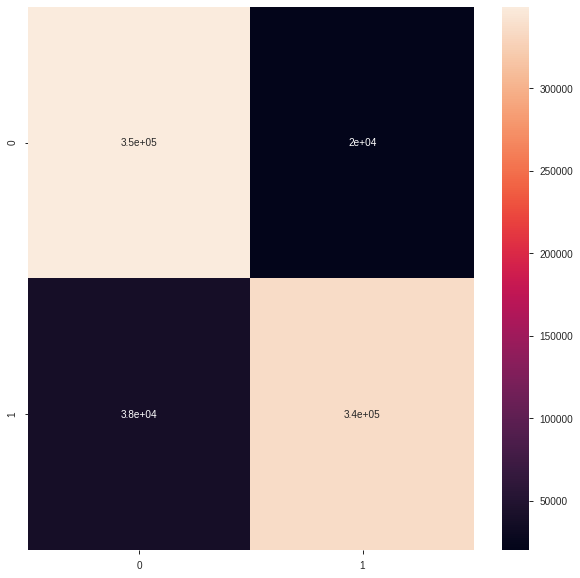

In [ ]:
from sklearn.metrics import confusion_matrix

#if plot doesn't show up try
#%matplotlib inline
#plt.close('all')

y_pred = cv_xgb.best_estimator_.predict(X_train)  
fig, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_train, y_pred), annot = True)

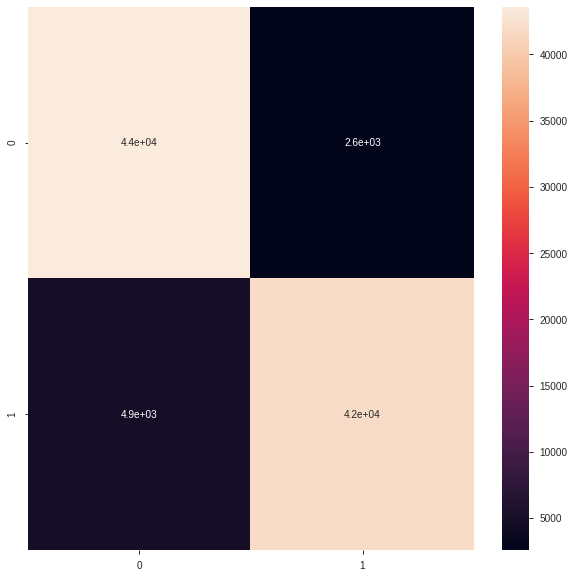

In [ ]:
from sklearn.metrics import confusion_matrix

#if plot doesn't show up try
#%matplotlib inline
#plt.close('all')

y_pred = cv_xgb.best_estimator_.predict(X_test)  
fig, ax =  plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)


In [ ]:
print(xgb_clf.feature_importances_)
print(col_names)

[2.6240719e-03 3.6175635e-02 6.9063105e-02 0.0000000e+00 5.3720079e-02
 1.1345384e-03 2.0672215e-02 5.0417922e-04 0.0000000e+00 3.4452010e-02
 3.4142684e-02 3.1498272e-02 1.7342576e-03 1.9445801e-02 9.4713001e-03
 5.2584265e-03 8.5539343e-03 6.7154950e-01]
Index(['Previously_Insured', 'Gender_Female', 'Gender_Male',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'age_range_Elderly',
       'age_range_Middle', 'age_range_Older', 'age_range_Young', 'Age',
       'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'insured_with_damage', 'not_insured_with_damage'],
      dtype='object')
